### Support Vector Classification

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, classification_report

In [2]:
df = pd.read_csv(r'D:\my stuff\Coding\ML\hotel_cancellation.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [4]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [6]:
my_df = df.select_dtypes(exclude=[object])
my_df.corr()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
number of adults,1.000000,-0.020027,0.103316,0.105416,0.011467,0.097014,-0.192175,-0.047395,-0.119106,0.296832,0.189317
number of children,-0.020027,1.000000,0.029536,0.024680,0.034198,-0.047058,-0.036371,-0.016398,-0.021201,0.337491,0.124363
number of weekend nights,0.103316,0.029536,1.000000,0.179548,-0.031102,0.046510,-0.067096,-0.020687,-0.026307,-0.004565,0.060432
number of week nights,0.105416,0.024680,0.179548,1.000000,-0.048814,0.149600,-0.099782,-0.030089,-0.049354,0.022751,0.046136
car parking space,0.011467,0.034198,-0.031102,-0.048814,1.000000,-0.066444,0.110916,0.027109,0.063814,0.061310,0.087889
lead time,0.097014,-0.047058,0.046510,0.149600,-0.066444,1.000000,-0.135966,-0.045718,-0.078126,-0.062578,-0.101604
repeated,-0.192175,-0.036371,-0.067096,-0.099782,0.110916,-0.135966,1.000000,0.390811,0.539157,-0.174881,-0.011834
P-C,-0.047395,-0.016398,-0.020687,-0.030089,0.027109,-0.045718,0.390811,1.000000,0.468148,-0.063334,-0.003323
P-not-C,-0.119106,-0.021201,-0.026307,-0.049354,0.063814,-0.078126,0.539157,0.468148,1.000000,-0.113673,0.027363
average price,0.296832,0.337491,-0.004565,0.022751,0.061310,-0.062578,-0.174881,-0.063334,-0.113673,1.000000,0.184468


In [7]:
df1 = df[['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'car parking space','type of meal',
 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'booking status']]

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   car parking space         36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   lead time                 36285 non-null  int64  
 7   market segment type       36285 non-null  object 
 8   repeated                  36285 non-null  int64  
 9   P-C                       36285 non-null  int64  
 10  P-not-C                   36285 non-null  int64  
 11  average price             36285 non-null  float64
 12  special requests          36285 non-null  int64  
 13  booking status            36285 non-null  object 
dtypes: flo

In [9]:
df1.isnull().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
car parking space           0
type of meal                0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
booking status              0
dtype: int64

<Axes: ylabel='number of weekend nights'>

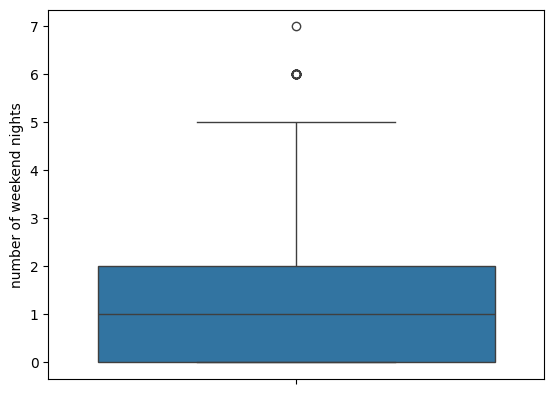

In [10]:
sns.boxplot(df1['number of weekend nights'])

<Axes: ylabel='number of weekend nights'>

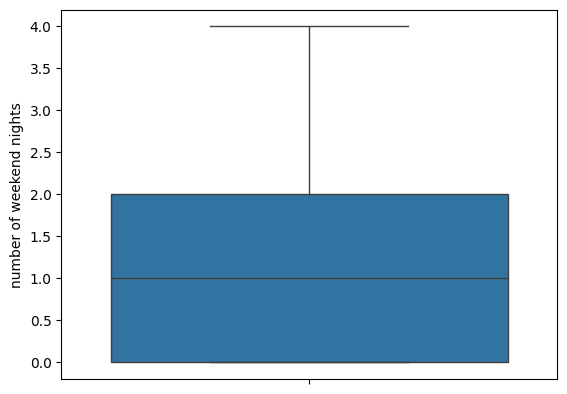

In [11]:
Q1 = df1['number of weekend nights'].quantile(0.25)
Q3 = df1['number of weekend nights'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['number of weekend nights'] > l_limit) & (df1['number of weekend nights'] < u_limit)]
sns.boxplot(df2['number of weekend nights'])

<Axes: ylabel='number of week nights'>

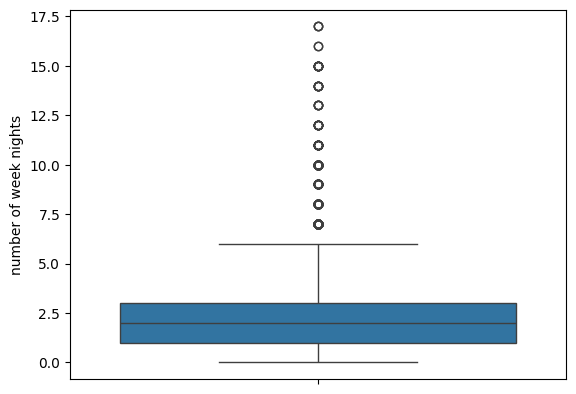

In [12]:
sns.boxplot(df1['number of week nights'])

<Axes: ylabel='number of week nights'>

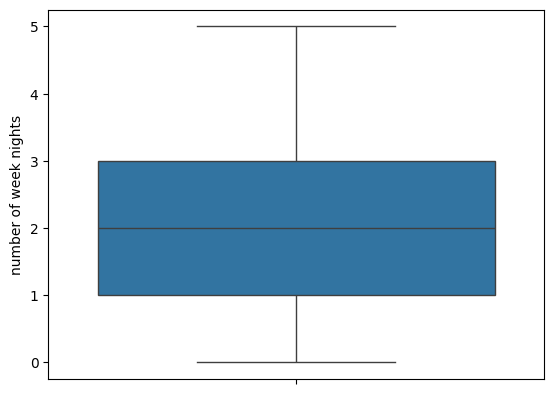

In [13]:
Q1 = df1['number of week nights'].quantile(0.25)
Q3 = df1['number of week nights'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['number of week nights'] > l_limit) & (df1['number of week nights'] < u_limit)]
sns.boxplot(df2['number of week nights'])

<Axes: ylabel='lead time'>

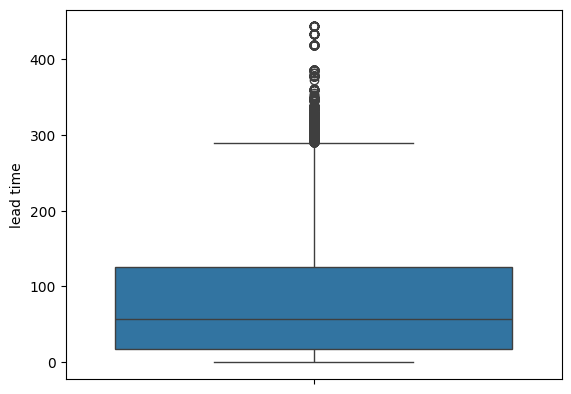

In [14]:
sns.boxplot(df1['lead time'])

<Axes: ylabel='lead time'>

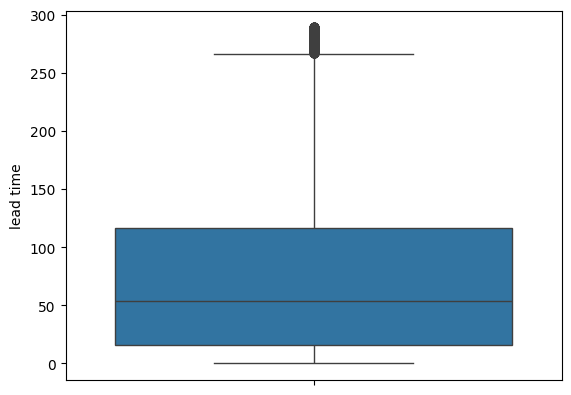

In [15]:
Q1 = df1['lead time'].quantile(0.25)
Q3 = df1['lead time'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['lead time'] > l_limit) & (df1['lead time'] < u_limit)]
sns.boxplot(df2['lead time'])

<Axes: ylabel='market segment type'>

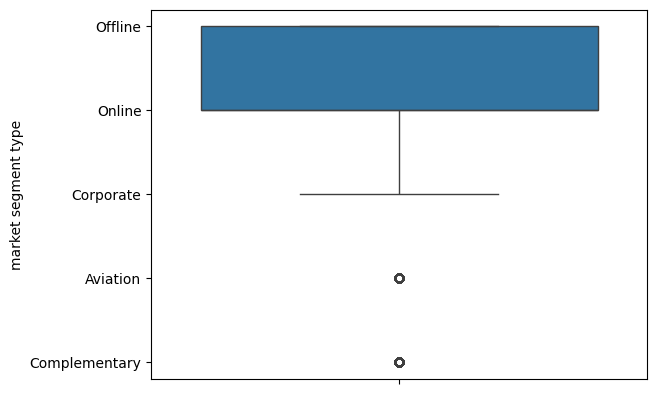

In [16]:
sns.boxplot(df1['market segment type'])

<Axes: ylabel='average price'>

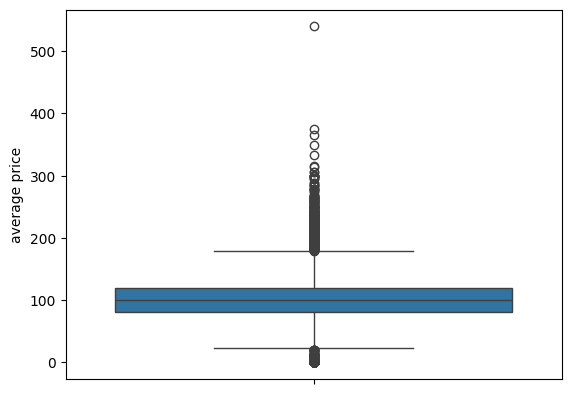

In [17]:
sns.boxplot(df1['average price'])

<Axes: ylabel='average price'>

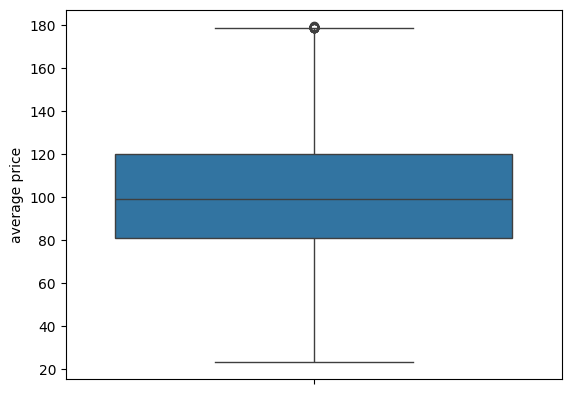

In [18]:
Q1 = df1['average price'].quantile(0.25)
Q3 = df1['average price'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['average price'] > l_limit) & (df1['average price'] < u_limit)]
sns.boxplot(df2['average price'])

<Axes: ylabel='booking status'>

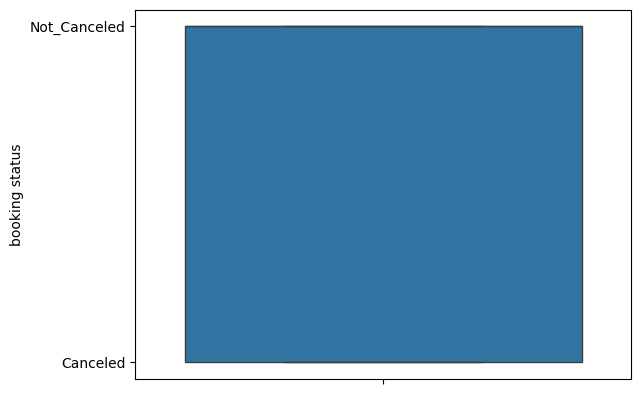

In [19]:
sns.boxplot(df1['booking status'])

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34589 entries, 0 to 36284
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          34589 non-null  int64  
 1   number of children        34589 non-null  int64  
 2   number of weekend nights  34589 non-null  int64  
 3   number of week nights     34589 non-null  int64  
 4   car parking space         34589 non-null  int64  
 5   type of meal              34589 non-null  object 
 6   lead time                 34589 non-null  int64  
 7   market segment type       34589 non-null  object 
 8   repeated                  34589 non-null  int64  
 9   P-C                       34589 non-null  int64  
 10  P-not-C                   34589 non-null  int64  
 11  average price             34589 non-null  float64
 12  special requests          34589 non-null  int64  
 13  booking status            34589 non-null  object 
dtypes: float64(

In [21]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df2['market segment type'] = lb.fit_transform(df2['market segment type'])
df2['type of meal'] = lb.fit_transform(df2['type of meal'])
df2['booking status'] = lb.fit_transform(df2['booking status'])

C:\Users\Mrunmayee\AppData\Local\Temp\ipykernel_7764\2445423594.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['market segment type'] = lb.fit_transform(df2['market segment type'])
C:\Users\Mrunmayee\AppData\Local\Temp\ipykernel_7764\2445423594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['type of meal'] = lb.fit_transform(df2['type of meal'])
C:\Users\Mrunmayee\AppData\Local\Temp\ipykernel_7764\2445423594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

<Axes: ylabel='market segment type'>

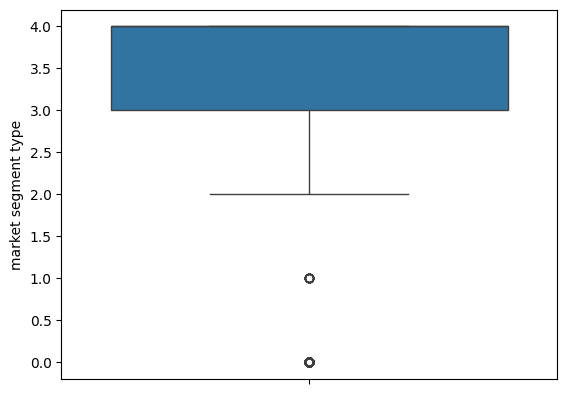

In [22]:
sns.boxplot(df2['market segment type'])

<Axes: ylabel='market segment type'>

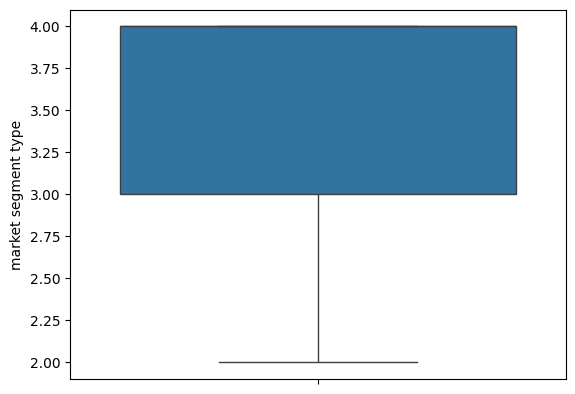

In [23]:
Q1 = df2['market segment type'].quantile(0.25)
Q3 = df2['market segment type'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df3 = df2[(df2['market segment type'] > l_limit) & (df2['market segment type'] < u_limit)]
sns.boxplot(df3['market segment type'])

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34448 entries, 0 to 36284
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          34448 non-null  int64  
 1   number of children        34448 non-null  int64  
 2   number of weekend nights  34448 non-null  int64  
 3   number of week nights     34448 non-null  int64  
 4   car parking space         34448 non-null  int64  
 5   type of meal              34448 non-null  int32  
 6   lead time                 34448 non-null  int64  
 7   market segment type       34448 non-null  int32  
 8   repeated                  34448 non-null  int64  
 9   P-C                       34448 non-null  int64  
 10  P-not-C                   34448 non-null  int64  
 11  average price             34448 non-null  float64
 12  special requests          34448 non-null  int64  
 13  booking status            34448 non-null  int32  
dtypes: float64(

In [32]:
x = df3[['number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'car parking space', 'type of meal',
 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests']]
y = df3['booking status']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [34]:
svm = SVC()
model = svm.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)


In [36]:
accuracy_score(y_test, y_pred)

0.7730043541364296

In [37]:
recall_score(y_test, y_pred, average='macro')

0.6882167964326537

In [38]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.43      0.56      2302
           1       0.77      0.94      0.85      4588

    accuracy                           0.77      6890
   macro avg       0.78      0.69      0.70      6890
weighted avg       0.78      0.77      0.75      6890

